In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from separation_en_caractères import separe_en_caracteres
from separation_en_lignes import separe_en_lignes

In [3]:
image = cv2.imread("scan_niv_gris_300ppp_fiche_ocr.bmp")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

indices_lignes = separe_en_lignes(image_binary, reduction=1)

In [8]:
print(len(indices_lignes))
print(len(image), len(image[0]))

37
3437 2409


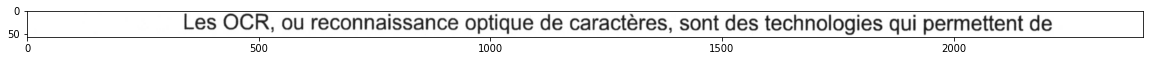

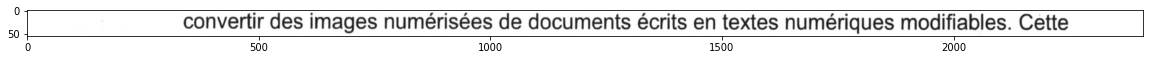

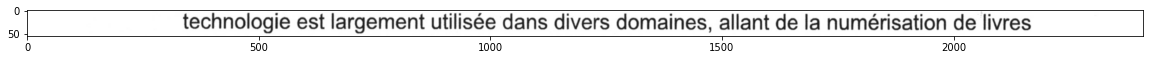

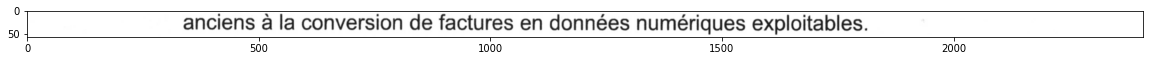

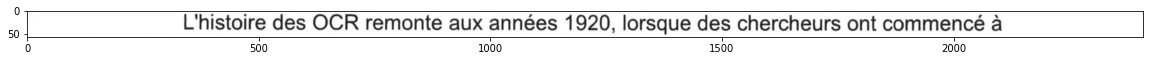

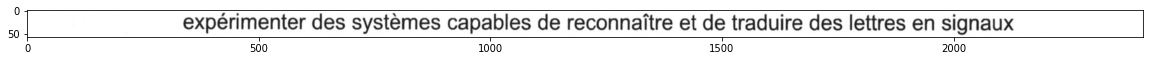

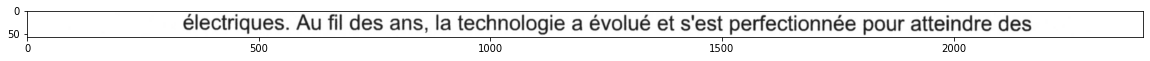

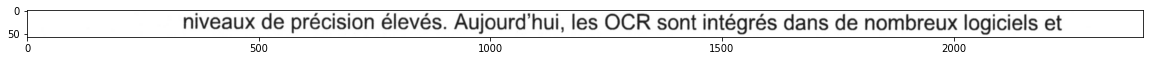

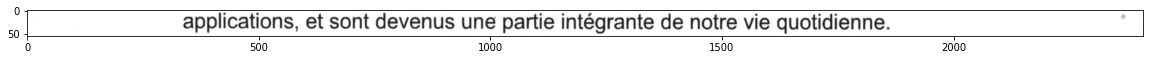

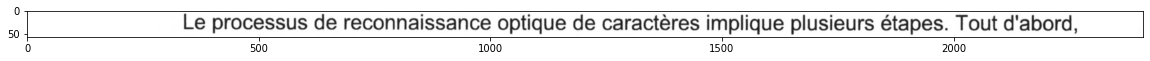

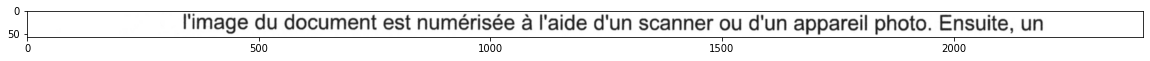

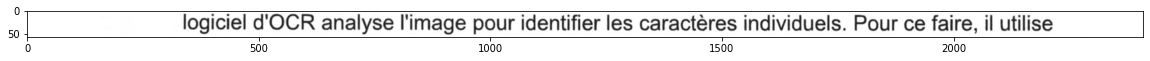

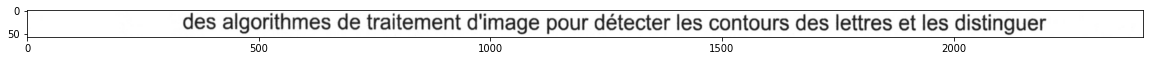

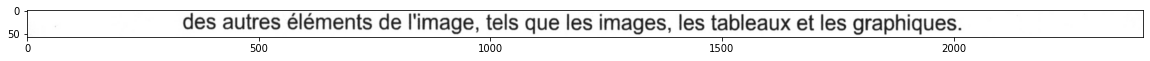

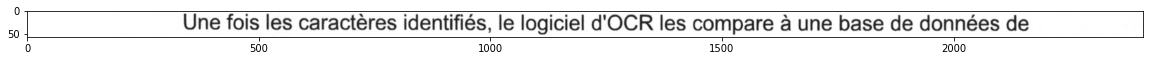

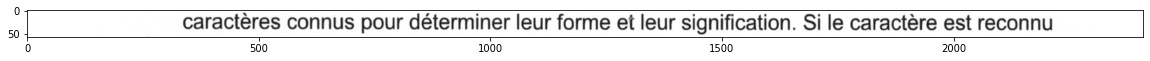

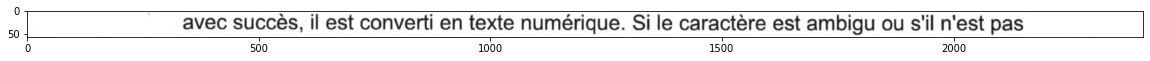

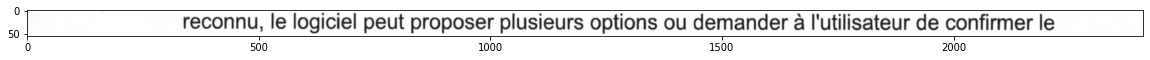

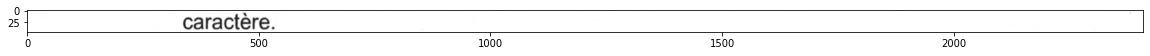

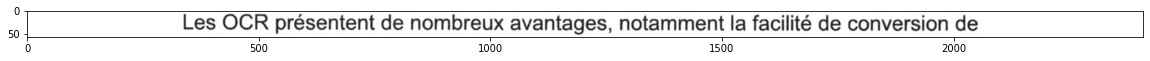

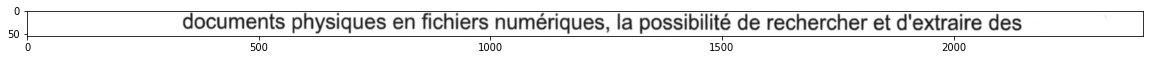

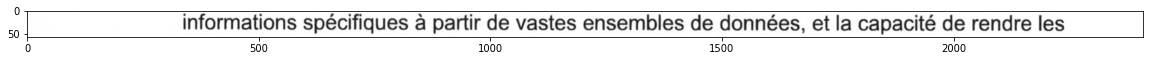

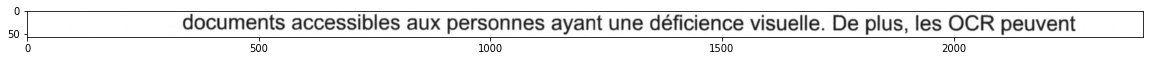

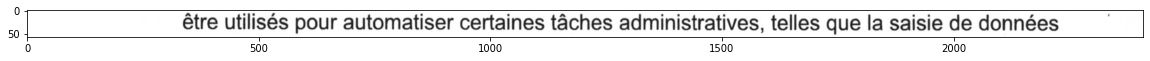

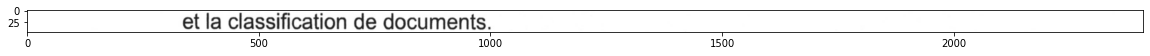

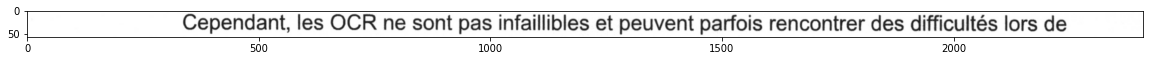

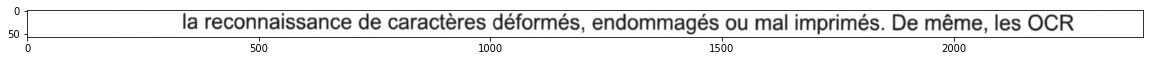

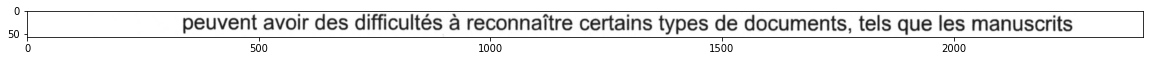

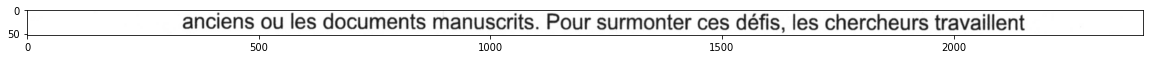

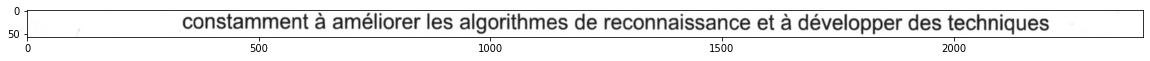

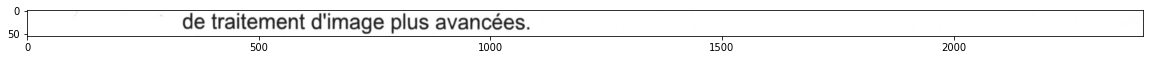

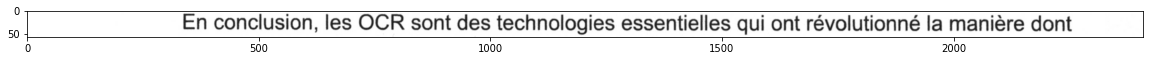

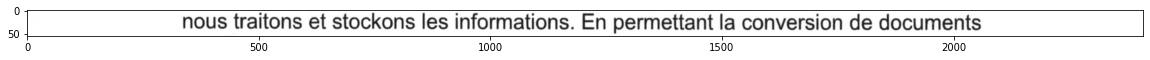

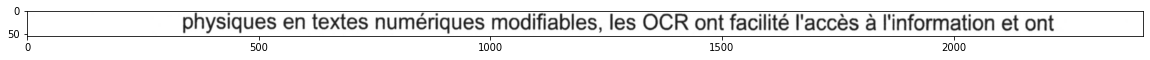

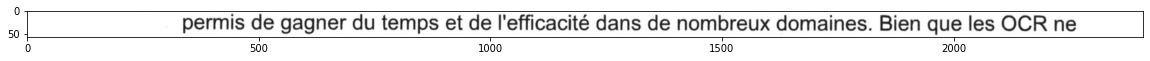

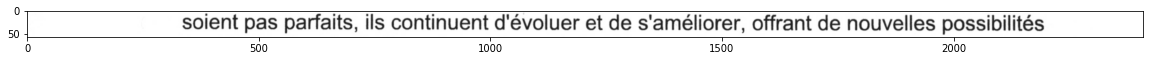

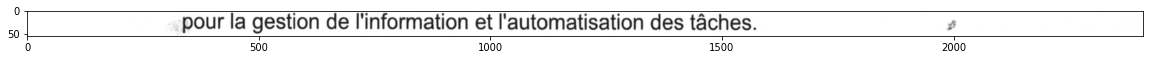

In [5]:
for t in indices_lignes :
    plt.figure(figsize=(20, 10))
    plt.imshow(image[t[0]:t[1]])
    plt.show()

In [13]:
a,b,c,d = separe_en_caracteres_local(image_binary, indices_lignes[0])

In [14]:
print(a)

[679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931,

In [18]:
print(b)
print(len(b))
for i in range(0, len(b)) :
    if b[i] != 1 :
        print(i, b[i])

[1 1 1 ... 1 1 1]
2902
40 6
84 8
123 34
186 9
244 11
302 10
312 37
356 9
395 38
422 3
466 8
507 5
552 9
592 12
632 10
675 11
685 10
723 7
763 7
807 10
847 11
889 5
933 32
978 9
1020 5
1044 6
1053 11
1094 11
1135 10
1179 33
1220 11
1263 34
1304 5
1347 11
1373 3
1416 9
1458 2
1482 4
1526 10
1553 3
1597 7
1636 11
1647 37
1686 7
1730 9
1770 8
1794 29
1836 10
1880 8
1919 31
1942 5
1986 8
2028 7
2066 12
2106 9
2151 9
2160 11
2205 6
2248 11
2258 9
2303 7
2343 32
2384 11
2424 12
2434 36
2478 7
2522 9
2549 5
2614 9
2658 6
2682 2
2706 3
2751 9
2792 7
2816 29
2858 10


In [12]:
def separe_en_caracteres_local(image_binary : np, indices_debut_fin_ligne : tuple, taux=0.001) -> list :

    # Définition de l'image binarisée de la ligne voulue
    h = image_binary[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1]]

    # Création d'un dictionnaire stockant le nombre de pixels noirs par colonne
    dictionnaire = {}
    for k in range(len(h[0])) :
        dictionnaire[k] = 0

    for i in range(len(h)) :
        for j in range(len(h[i])) :
            if h[i][j] == 0 :
                dictionnaire[j] += 1
    # On divise par le nombre de pixels pour avoir le taux de pixels noirs dans la colonne
    for num_colonne in dictionnaire.keys() :
        dictionnaire[num_colonne] /= len(h)

    # On conserve dans une liste ceux qui ont un taux >= 0.001
    indices = []
    for elt in dictionnaire.keys() :
        if dictionnaire[elt] >= taux :
            indices.append(elt)


    # Obtenir des plages continues de pixels représentant les caractères en rajoutant un peu d'espace entre les caractères pour ne pas qu'ils soient sérrés dans leurs cases
    d = np.diff(indices)
    espaces =[int(val/2) for val in d if val > 1]

    
    ranges = []
    start = indices[0]
    indices_espaces = 0
    for i in range(1, len(indices)):
        if indices[i] != indices[i - 1] + 1:
            if indices_espaces >= 1 :
                val_avant = espaces[indices_espaces-1] 
            else :
                val_avant = espaces[indices_espaces]
            val_apres = espaces[indices_espaces]
            ranges.append((start-val_avant, indices[i - 1]+val_apres))
            start = indices[i]
            indices_espaces += 1
    ranges.append((start-val_avant, indices[-1]+val_avant))

    return indices, d, espaces, ranges


In [22]:
def separe_en_caracteres_local_2(image_binary: np.ndarray, indices_debut_fin_ligne: tuple, taux=0.001, seuil_espace_mot=15) -> list:
    """
    Description : Prend en entrée une ligne de texte dans une image et renvoie les indices de colonnes de début et de fin de chaque caractère,
                  incluant les espaces entre les mots.

    Exemple : >>> ranges = separe_en_caracteres(image_binary, indices_debut_fin_ligne)
                  ranges = [ (0, 21), (25, 65), ' ', (80, 85), ...]

    Inputs : - image_binary (np.ndarray) : la version binarisée de l'image dont on veut extraire les caractères
             - indices_debut_fin_ligne (tuple) : les indices de début et de fin de la ligne dont on veut extraire les caractères
             - taux (float) : fixé de base à 0.001, permet de séparer les colonnes de pixels contenant de l'information ou non
             - seuil_espace_mot (int) : le seuil pour détecter les espaces entre les mots

    Output : (ranges) list : une liste de tuples des indices de colonnes de début et de fin de chaque caractère et espaces pour la ligne entrée
    """
   
    # Définition de l'image binarisée de la ligne voulue
    h = image_binary[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1]]

    # Création d'un dictionnaire stockant le nombre de pixels noirs par colonne
    dictionnaire = {}
    for k in range(len(h[0])):
        dictionnaire[k] = 0

    for i in range(len(h)):
        for j in range(len(h[i])):
            if h[i][j] == 0:
                dictionnaire[j] += 1
    # On divise par le nombre de pixels pour avoir le taux de pixels noirs dans la colonne
    for num_colonne in dictionnaire.keys():
        dictionnaire[num_colonne] /= len(h)

    # On conserve dans une liste ceux qui ont un taux >= 0.001
    indices = []
    for elt in dictionnaire.keys():
        if dictionnaire[elt] >= taux:
            indices.append(elt)

    # Obtenir des plages continues de pixels représentant les caractères et les espaces
    ranges = []
    start = indices[0]
    for i in range(1, len(indices)):
        if indices[i] != indices[i - 1] + 1:
            ranges.append((start, indices[i - 1]))
            # Si l'écart entre deux indices est grand, ajouter un espace pour les mots
            if indices[i] - indices[i - 1] > seuil_espace_mot:  # Utiliser le seuil pour détecter les espaces entre mots
                ranges.append(' ')
            start = indices[i]
    ranges.append((start, indices[-1]))

    return ranges



In [25]:
indices_debut_fin_ligne = indices_lignes[0]

v = separe_en_caracteres_local_2(image_binary, indices_lignes[0])
print(v)

[(679, 719), (725, 768), (776, 814), ' ', (848, 910), (919, 976), (987, 1044), (1054, 1063), ' ', (1100, 1143), (1152, 1190), ' ', (1228, 1254), (1257, 1300), (1308, 1348), (1353, 1397), (1406, 1445), (1457, 1496), (1506, 1548), (1559, 1568), (1578, 1615), (1622, 1661), (1668, 1711), (1721, 1760), (1771, 1812), (1817, 1860), ' ', (1892, 1936), (1945, 1986), (1991, 2014), (2020, 2028), (2039, 2079), (2090, 2130), (2140, 2183), ' ', (2216, 2256), (2267, 2309), ' ', (2343, 2383), (2388, 2430), (2441, 2466), (2469, 2511), (2520, 2561), (2563, 2586), (2590, 2633), (2643, 2669), (2672, 2715), (2722, 2760), (2771, 2781), ' ', (2818, 2856), (2863, 2906), (2915, 2954), (2962, 2985), ' ', (3014, 3055), (3065, 3108), (3116, 3154), ' ', (3185, 3207), (3212, 3255), (3263, 3304), (3311, 3348), (3360, 3399), (3408, 3452), (3461, 3469), (3480, 3524), (3530, 3572), (3583, 3592), (3601, 3645), (3652, 3691), ' ', (3723, 3763), (3774, 3813), (3825, 3834), ' ', (3870, 3913), (3920, 3963), (3972, 3998), (40

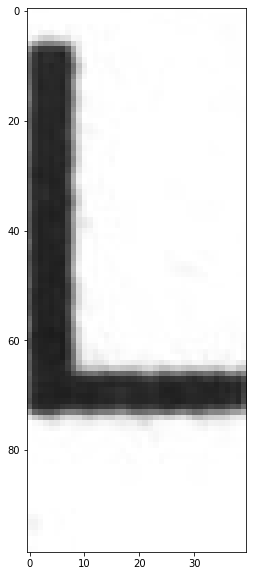

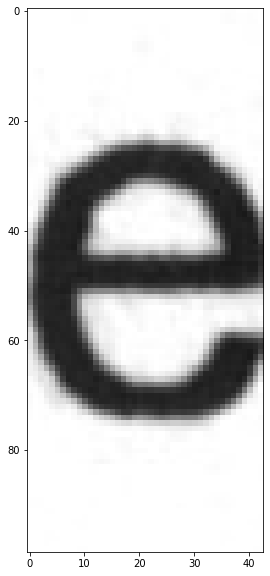

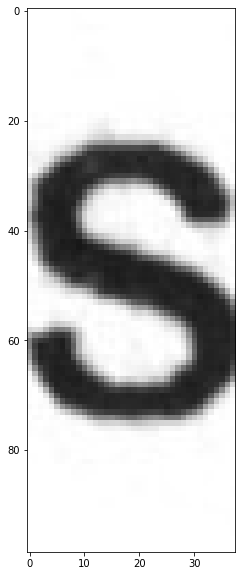

espace


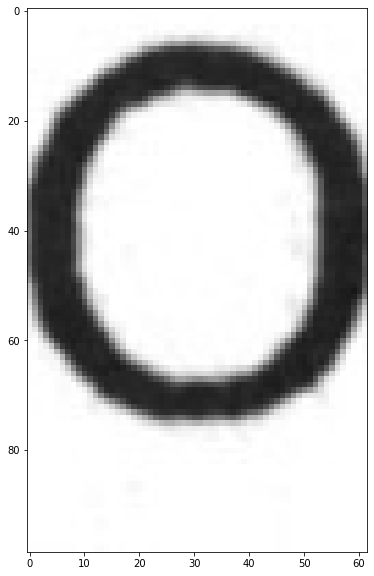

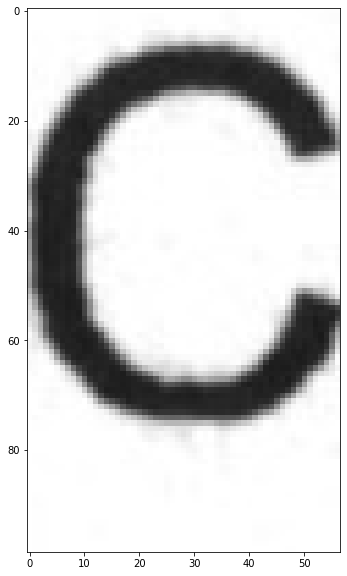

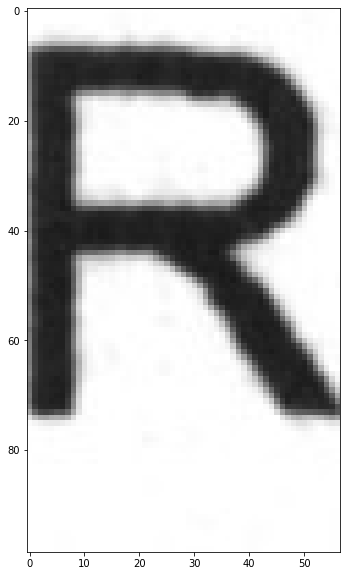

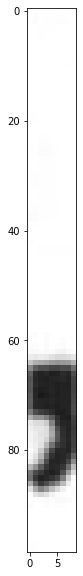

espace


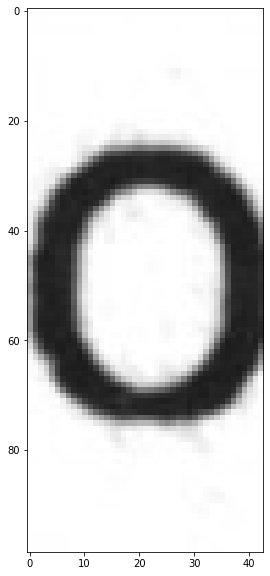

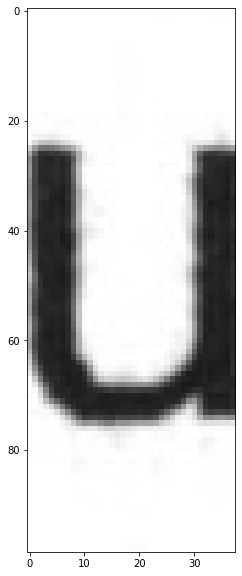

espace


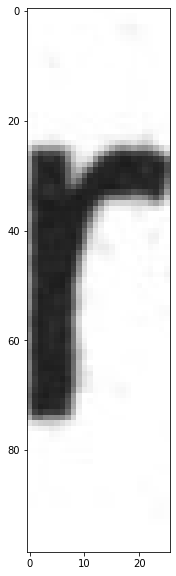

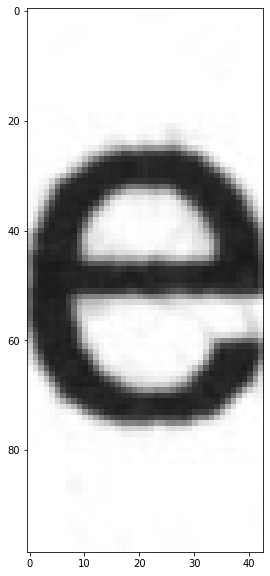

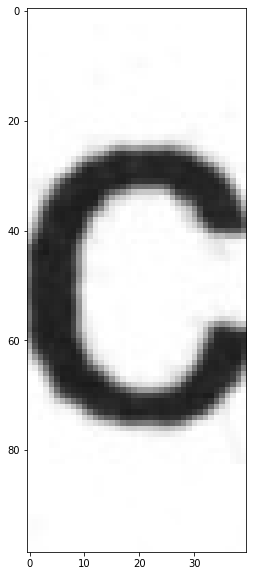

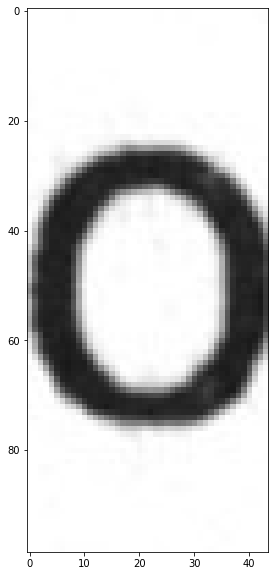

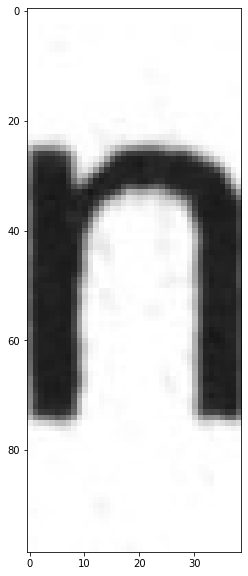

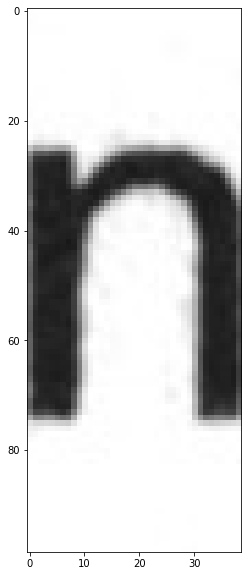

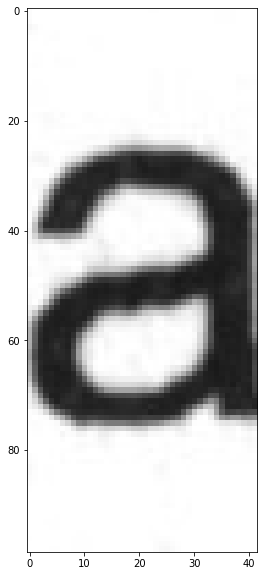

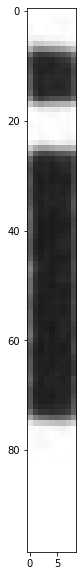

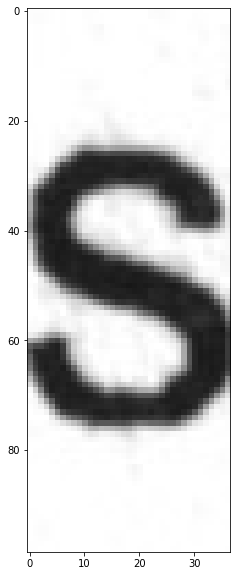

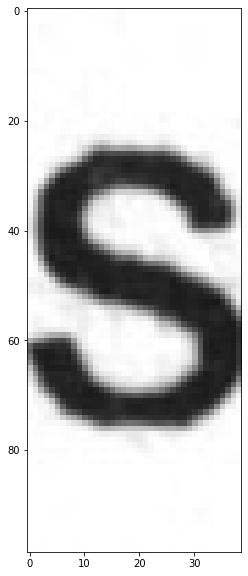

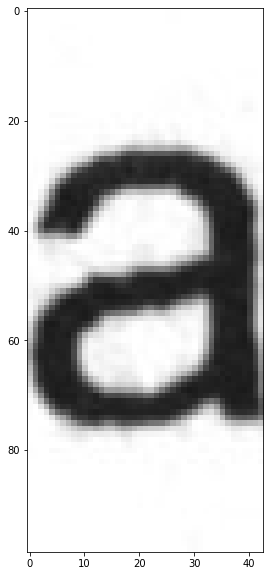

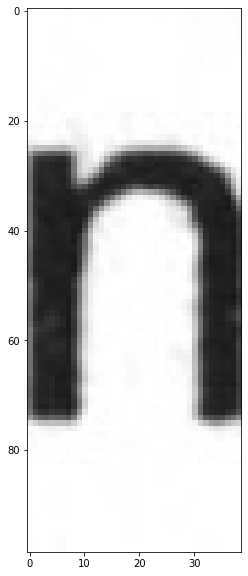

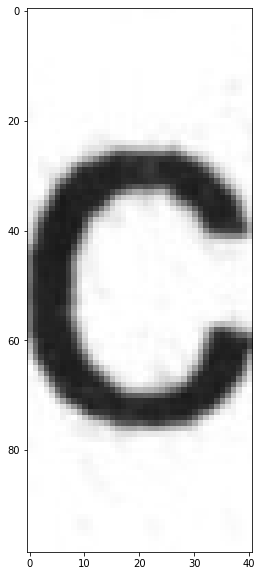

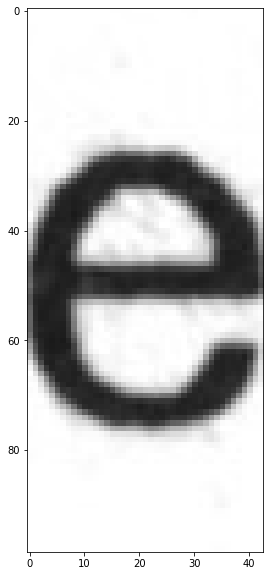

espace


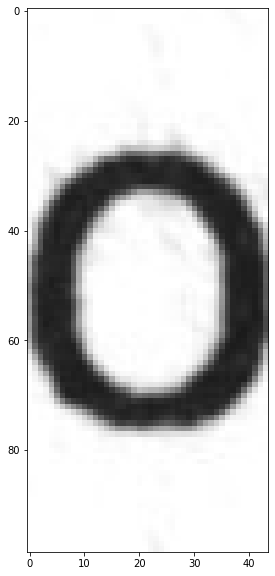

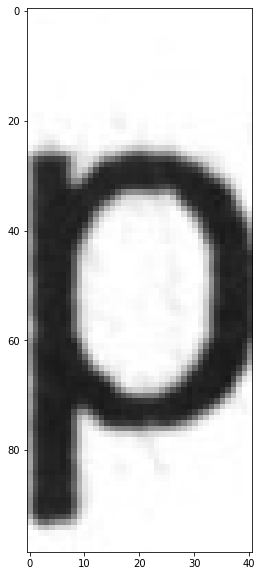

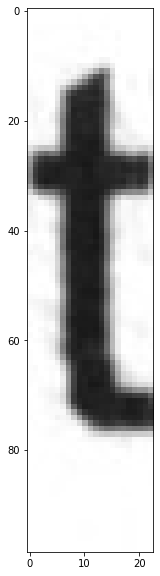

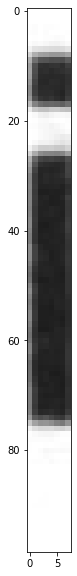

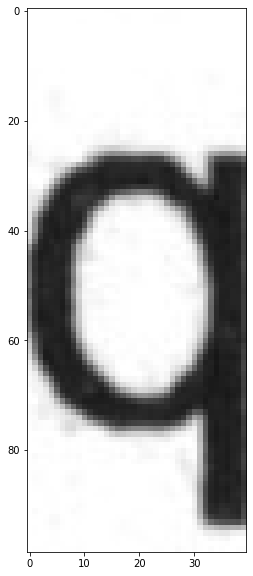

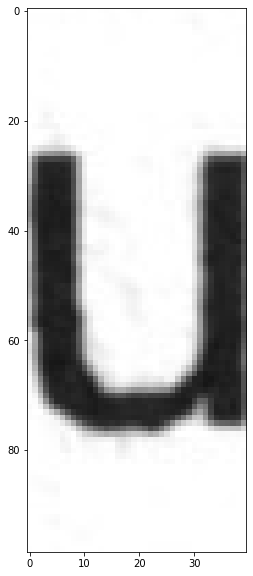

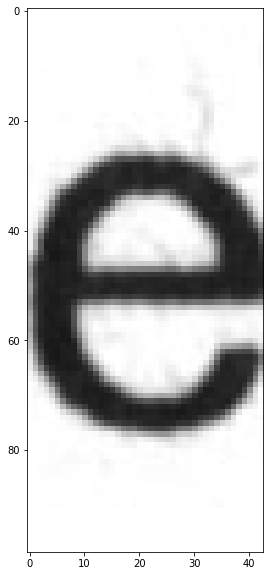

espace


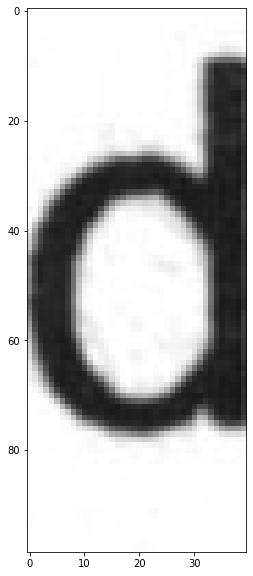

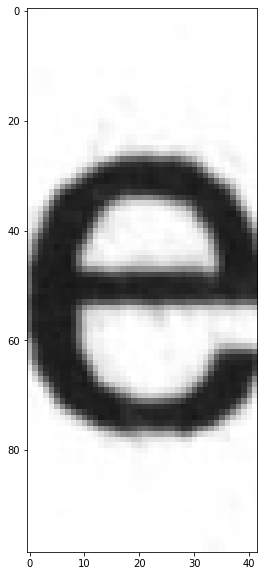

espace


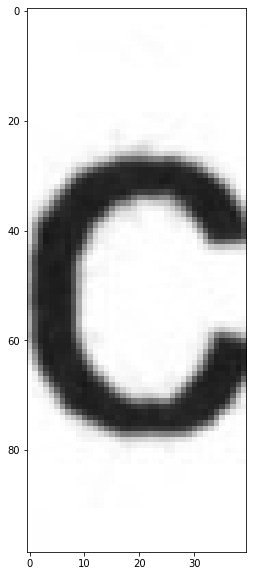

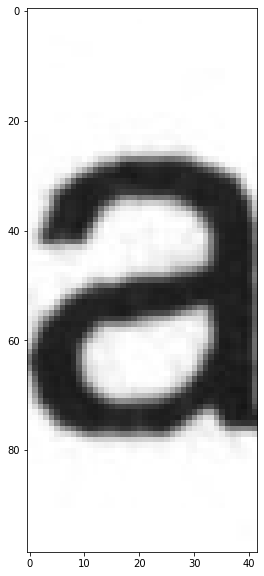

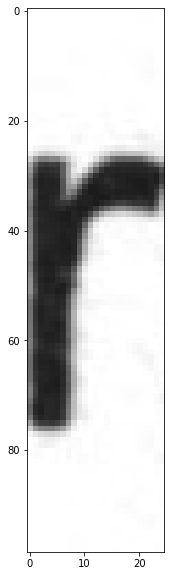

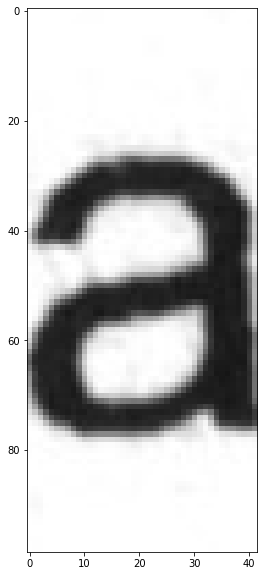

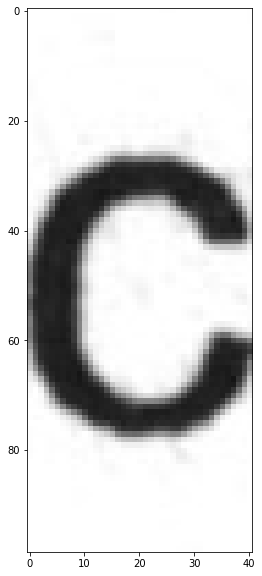

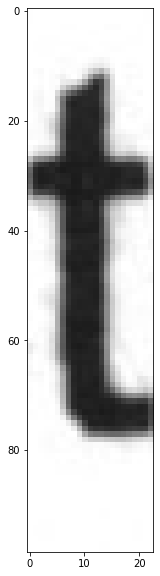

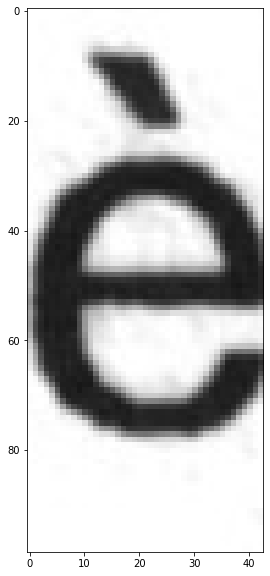

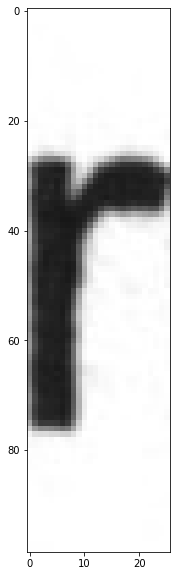

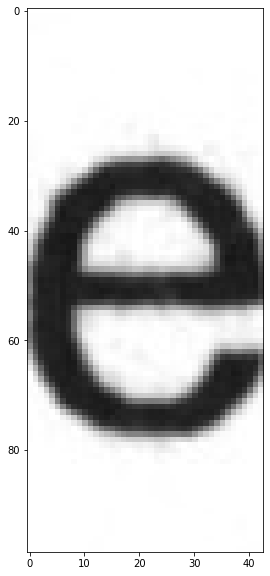

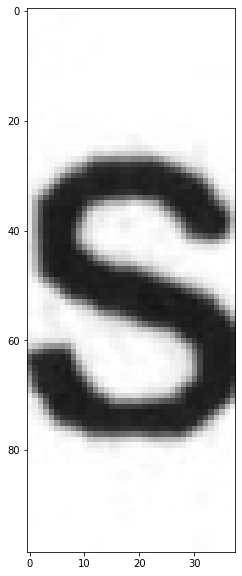

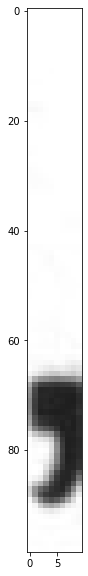

espace


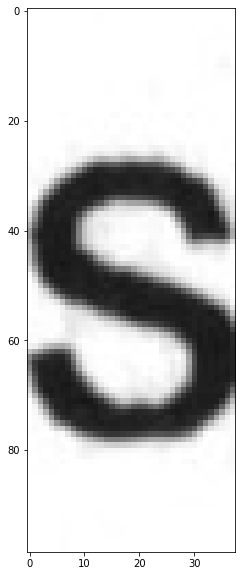

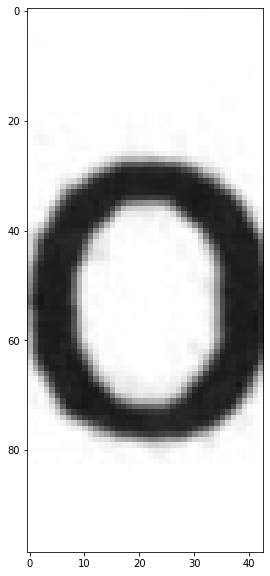

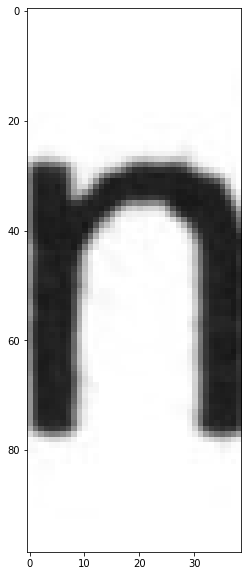

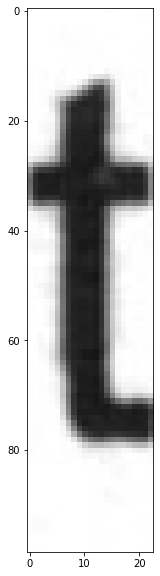

espace


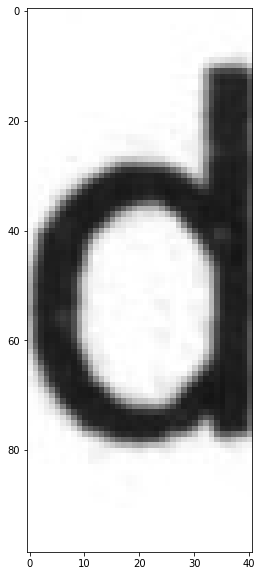

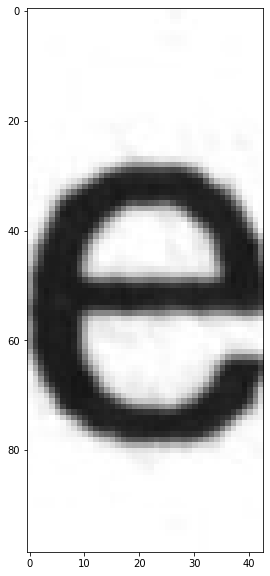

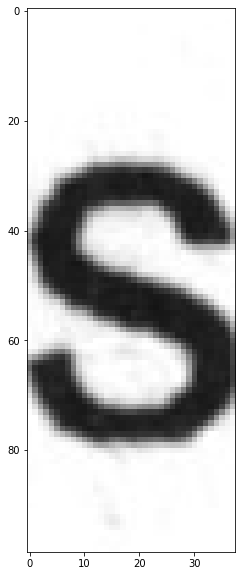

espace


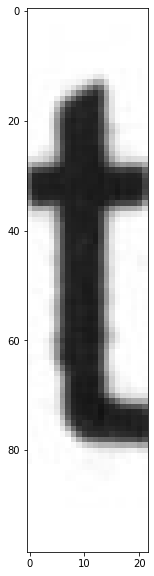

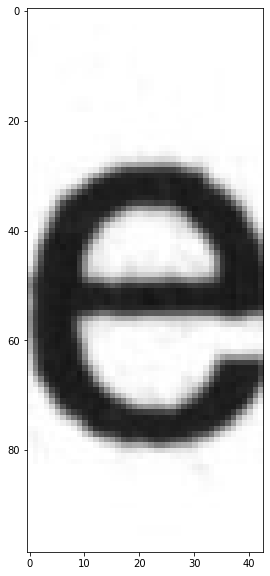

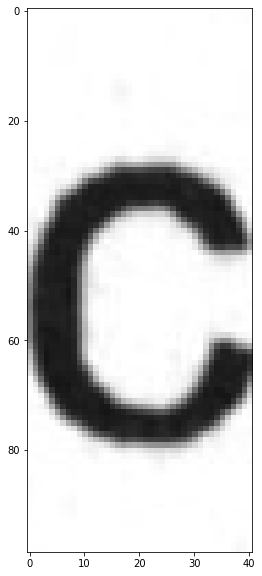

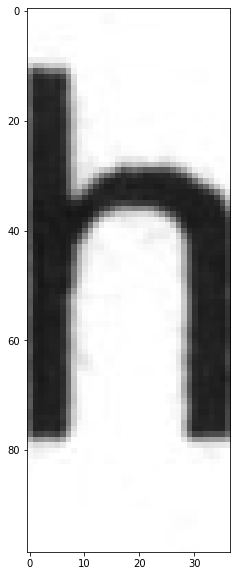

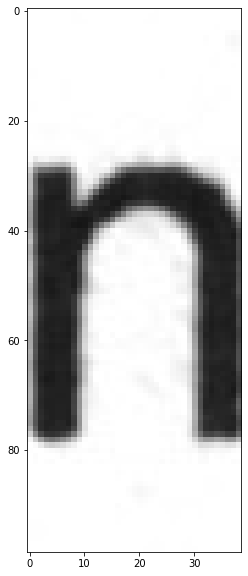

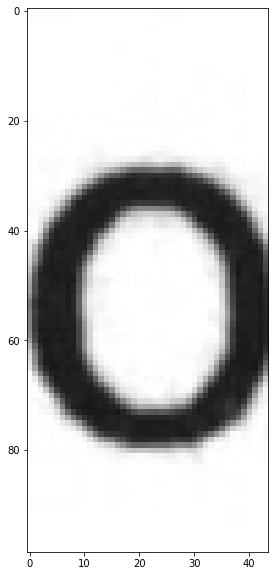

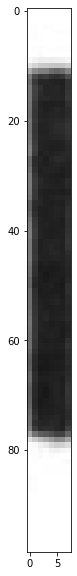

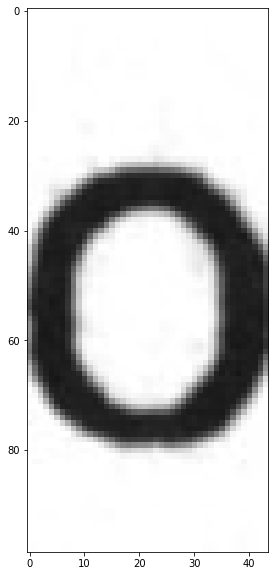

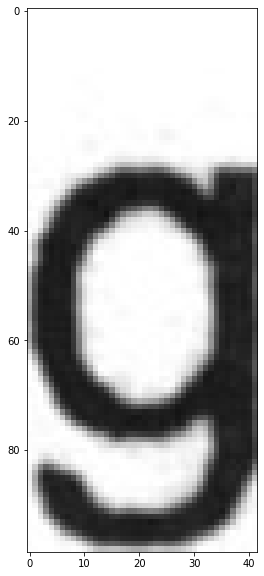

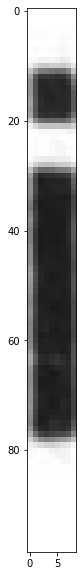

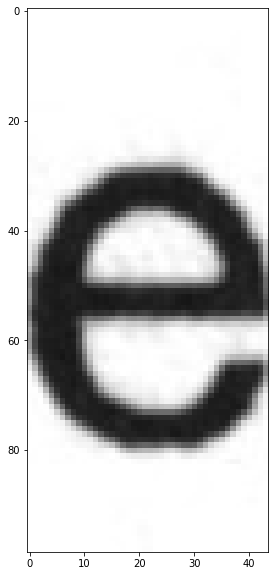

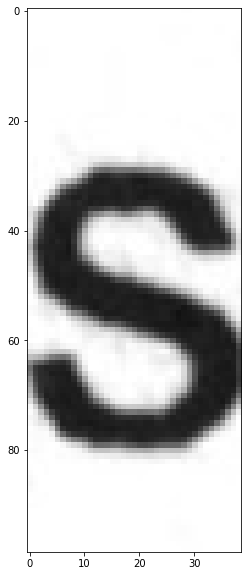

espace


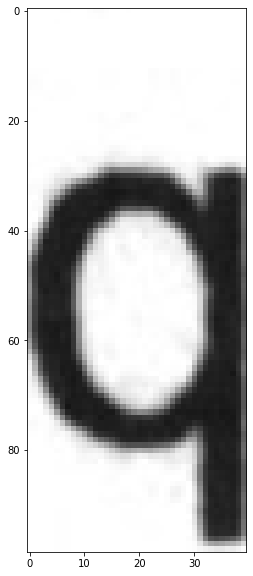

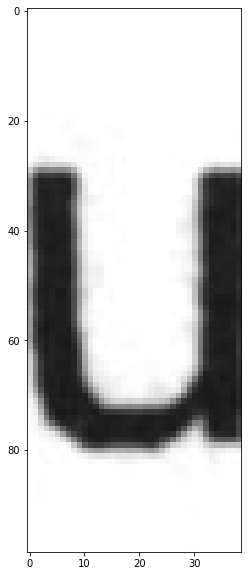

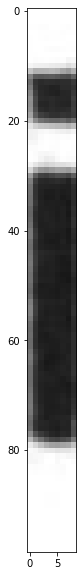

espace


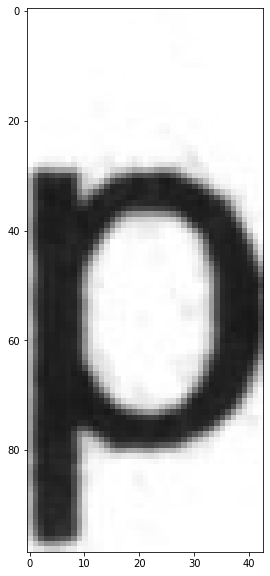

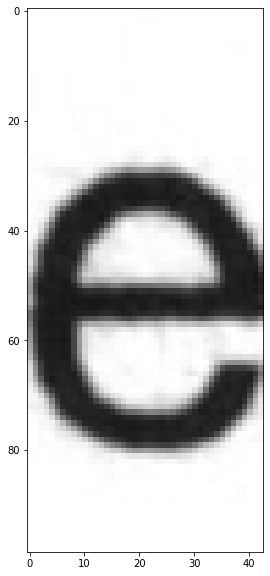

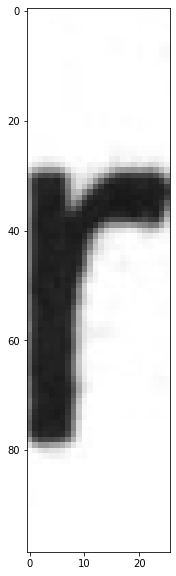

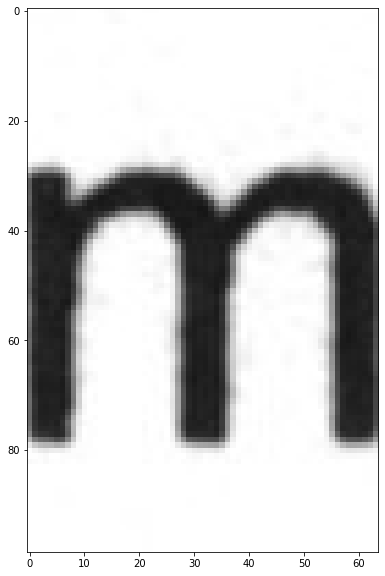

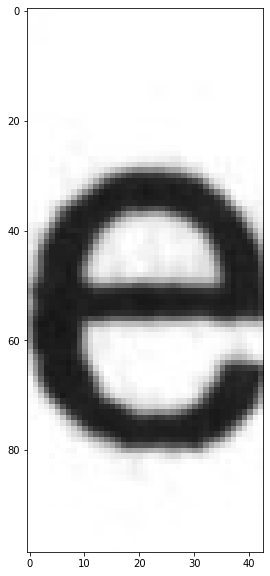

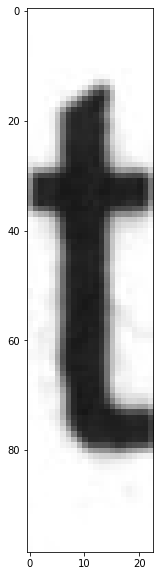

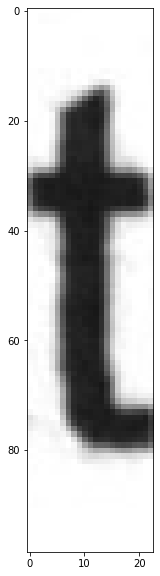

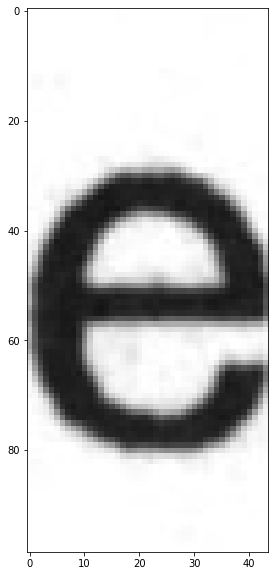

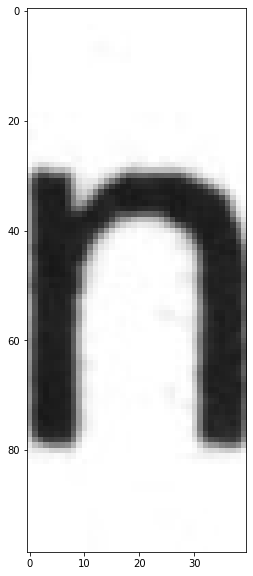

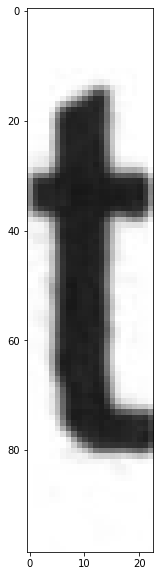

espace


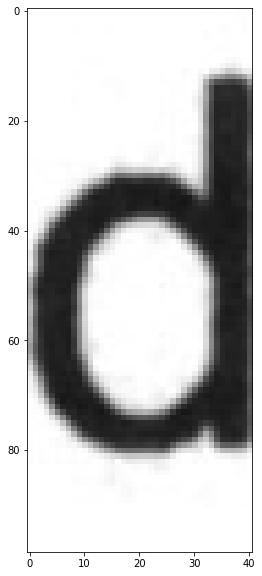

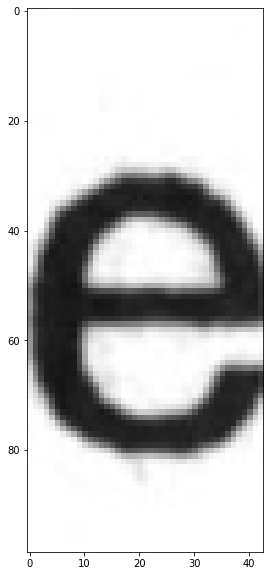

In [27]:
for elt in v :
    if elt != ' ' :
        plt.figure(figsize=(20,10))
        plt.imshow(image[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1], elt[0]:elt[1]])
        plt.show()
    else : 
        print("espace")